In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../data/ramen_pho_count.csv')

In [3]:
data.head()

,city,state,country,ramen_count,pho_count
0,San Francisco,California,USA,869,596
1,Toronto,Ontario,Canada,314,282
2,Vancouver,British Columbia,Canada,303,274
3,Los Angeles,California,USA,1802,1503
4,Chicago,Illinois,USA,431,232


In [4]:
data = data.rename(columns={'ramen_count': 'ramen', 'pho_count': 'pho'})
keys = ['ramen', 'pho']
df = pd.melt(data, id_vars=['city', 'state'], value_vars=keys, value_name='count')
df = df.rename(columns={'variable': 'noodle_type'})
df = df.sort_values(by=['count'], ascending=False)
df.head()

,city,state,noodle_type,count
3,Los Angeles,California,ramen,1802
30,Los Angeles,California,pho,1503
5,New York,New York,ramen,1501
0,San Francisco,California,ramen,869
27,San Francisco,California,pho,596


In [5]:
df.describe()

,count
count,54.000000
mean,309.981481
std,354.627601
min,39.000000
25%,103.750000
50%,228.000000
75%,311.250000
max,1802.000000


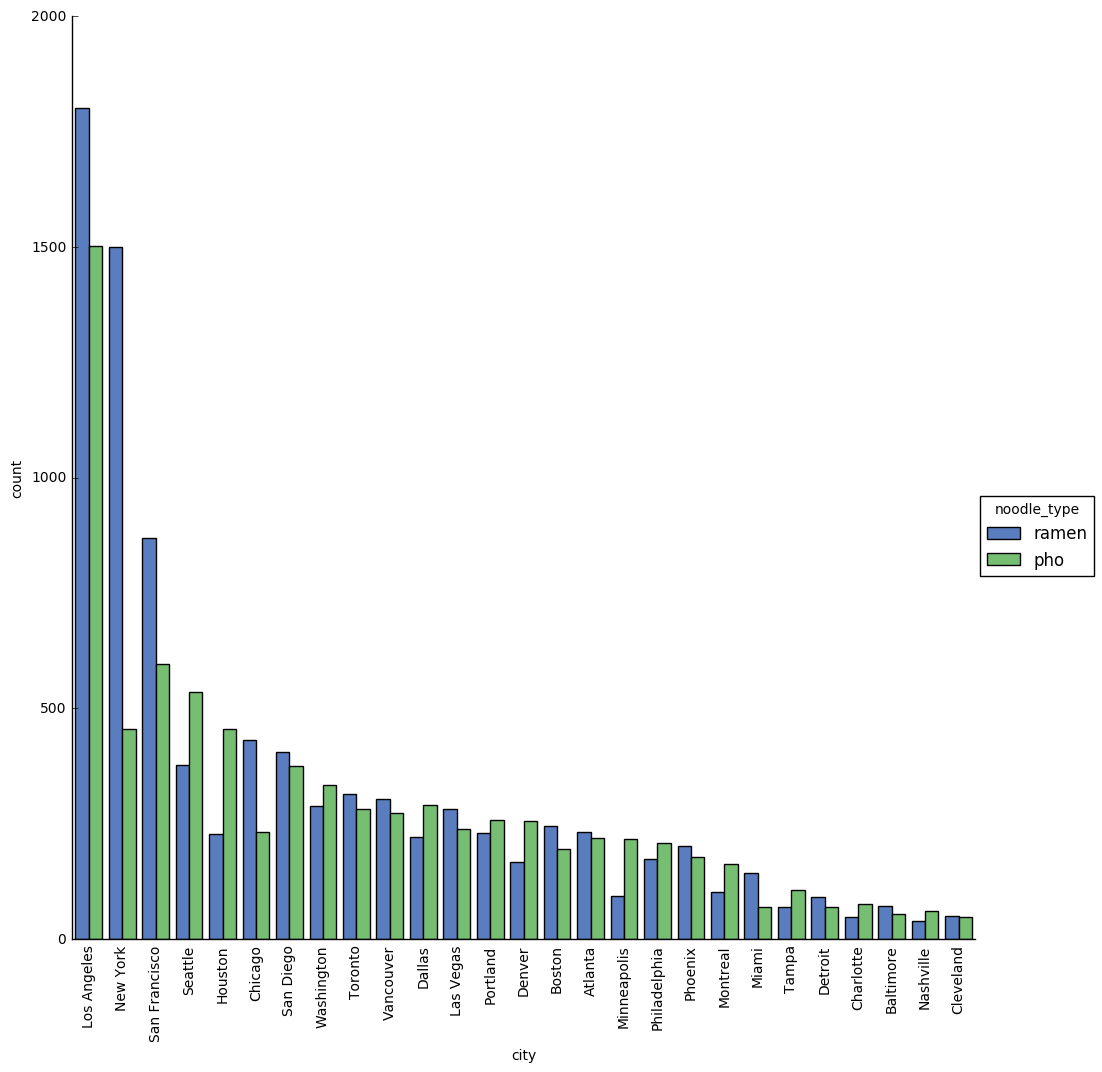

In [6]:
g = sns.factorplot(x='city', y='count', hue='noodle_type', data=df, kind='bar', size=10, palette='muted')
g.set_ylabels('count')
plt.xlabel('city')
plt.xticks(rotation=90)
fig = plt.gcf()
plt.show()
fig.savefig('../results/ramen_pho_comparison.png')

In [27]:
data['total']=data['ramen']+data['pho']
data['pho_proportion']=data['pho']/data['total']
data['ramen_proportion']=data['ramen']/data['total']
data = data[(data.total > 200)]

In [28]:
top_pho = data.sort_values(by='pho_proportion', ascending=False).head()
top_pho

,city,state,country,ramen,pho,total,pho_proportion,ramen_proportion
18,Minneapolis,Minnesota,USA,94,218,312,0.698718,0.301282
6,Houston,Texas,USA,227,455,682,0.667155,0.332845
8,Montreal,Quebec,Canada,103,163,266,0.612782,0.387218
20,Denver,Colorado,USA,168,256,424,0.603774,0.396226
16,Seattle,Washington,USA,377,535,912,0.586623,0.413377


In [29]:
top_ramen = data.sort_values(by='pho_proportion').head()
top_ramen

,city,state,country,ramen,pho,total,pho_proportion,ramen_proportion
5,New York,New York,USA,1501,455,1956,0.232618,0.767382
13,Miami,Florida,USA,143,70,213,0.328638,0.671362
4,Chicago,Illinois,USA,431,232,663,0.349925,0.650075
0,San Francisco,California,USA,869,596,1465,0.406826,0.593174
12,Boston,Massachusetts,USA,246,195,441,0.442177,0.557823
